# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [34]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [15]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [16]:
spaceship.shape

(8693, 14)

**Check for data types**

In [17]:
print(spaceship.dtypes)

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


**Check for missing values**

In [18]:
spaceship.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [19]:
spaceship_clean = spaceship.dropna()

- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [20]:
spaceship_clean['Cabin'] = spaceship_clean['Cabin'].str[0]


/var/folders/nd/m5ygx_wn1pg8b_rwctvdksd80000gn/T/ipykernel_13686/3390320298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spaceship_clean['Cabin'] = spaceship_clean['Cabin'].str[0]


с

In [21]:
spaceship_clean = spaceship_clean.drop(['PassengerId', 'Name'], axis=1)

- For non-numerical columns, do dummies.

In [22]:
categorical_cols = spaceship_clean.select_dtypes(include='object').columns
spaceship_clean = pd.get_dummies(spaceship_clean, columns=categorical_cols, drop_first=True)


In [23]:
spaceship_clean.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,True,False,False,False,False,False,False,False,True,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True,False,False,False,False,False,False,False,True,False,False,False,True,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,True,False,False,False,False,False,False,False,False,False,False,True,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,True,False,False,False,False,False,False,False,False,False,False,True,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True,False,False,False,False,False,False,False,True,False,False,False,True,False


**Perform Train Test Split**

In [24]:
from sklearn.model_selection import train_test_split

# X — признаки, Y — целевая переменная
X = spaceship_clean.drop('Transported', axis=1)
y = spaceship_clean['Transported']

# Разбиваем: 80% на обучение, 20% на тест, фиксируем random_state для воспроизводимости
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [35]:


# 1. Стандартизация
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# 2. МинМакс масштабирование
scaler_mm = MinMaxScaler()
X_train_mm = scaler_mm.fit_transform(X_train)
X_test_mm = scaler_mm.transform(X_test)

# Создаем и обучаем KNN (например, с 5 соседями)
knn = KNeighborsClassifier(n_neighbors=5)

# Обучаем и оцениваем со стандартизацией
knn.fit(X_train_std, y_train)
pred_std = knn.predict(X_test_std)
acc_std = accuracy_score(y_test, pred_std)
print("Accuracy with StandardScaler:", acc_std)

# Обучаем и оцениваем с MinMax
knn.fit(X_train_mm, y_train)
pred_mm = knn.predict(X_test_mm)
acc_mm = accuracy_score(y_test, pred_mm)
print("Accuracy with MinMaxScaler:", acc_mm)

# Подробный отчет для лучшего варианта
print("\nClassification report for better scaler:")
if acc_std >= acc_mm:
    print(classification_report(y_test, pred_std))
else:
    print(classification_report(y_test, pred_mm))


Accuracy with StandardScaler: 0.764750378214826
Accuracy with MinMaxScaler: 0.7632375189107413

Classification report for better scaler:
              precision    recall  f1-score   support

       False       0.77      0.76      0.76       661
        True       0.76      0.77      0.77       661

    accuracy                           0.76      1322
   macro avg       0.76      0.76      0.76      1322
weighted avg       0.76      0.76      0.76      1322



- Evaluate your model's performance. Comment it

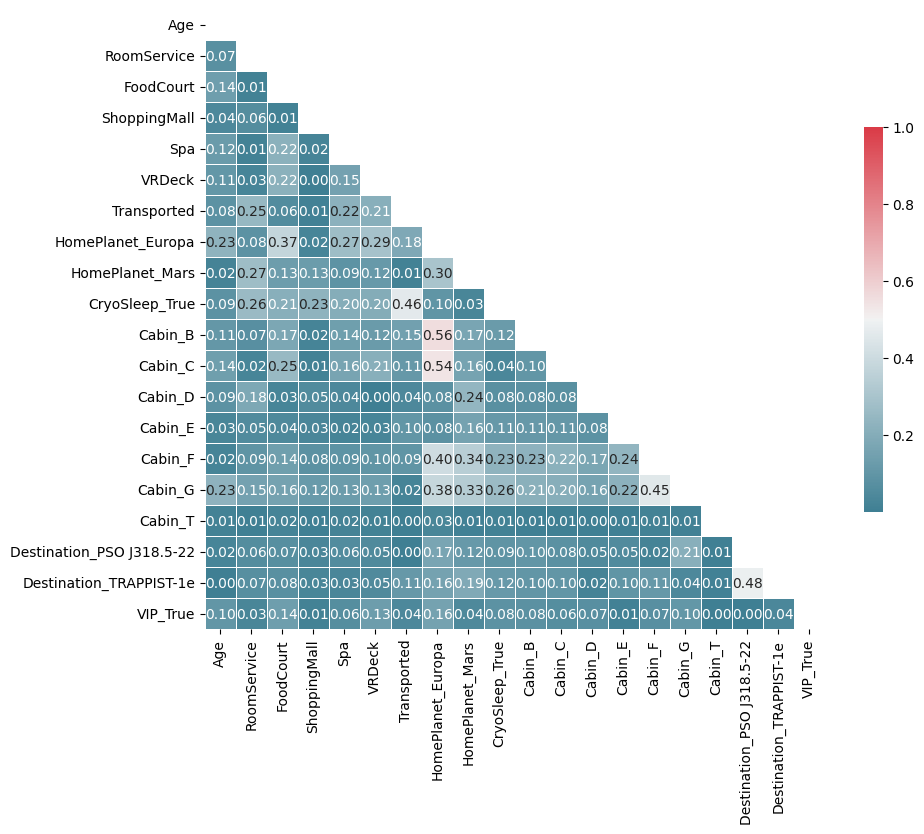

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr = np.abs(spaceship_clean.corr())

# Создаём маску для верхнего треугольника матрицы корреляций
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Создаём фигуру
f, ax = plt.subplots(figsize=(10, 10))

# Создаём цветовую палитру
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Рисуем тепловую карту с маской и аннотациями
sns.heatmap(corr, mask=mask, vmax=1, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, annot=corr, fmt=".2f", cmap=cmap, ax=ax)

plt.show()


In [44]:
from sklearn.model_selection import train_test_split

# 1. Разделяем на признаки и целевую переменную
X = spaceship_clean.drop(columns=['Transported'])  # целевая — 'Transported'
y = spaceship_clean['Transported']

# 2. Делим на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [45]:

corr = spaceship_clean.corr().abs()
upper_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.8)]

spaceship_clean_reduced = spaceship_clean.drop(columns=to_drop)

In [46]:

# 3. Удаляем коррелирующие колонки из X_train и X_test
X_train_reduced = X_train.drop(columns=to_drop)
X_test_reduced = X_test.drop(columns=to_drop)

In [47]:
# Стандартизация
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train_reduced)
X_test_std = scaler_std.transform(X_test_reduced)

# МинМакс
scaler_mm = MinMaxScaler()
X_train_mm = scaler_mm.fit_transform(X_train_reduced)
X_test_mm = scaler_mm.transform(X_test_reduced)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Обучение и оценка с StandardScaler
knn.fit(X_train_std, y_train)
pred_std = knn.predict(X_test_std)
acc_std = accuracy_score(y_test, pred_std)
print("Accuracy with StandardScaler:", acc_std)

# Обучение и оценка с MinMaxScaler
knn.fit(X_train_mm, y_train)
pred_mm = knn.predict(X_test_mm)
acc_mm = accuracy_score(y_test, pred_mm)
print("Accuracy with MinMaxScaler:", acc_mm)

# Подробный отчёт по лучшему варианту
print("\nClassification report for better scaler:")
if acc_std >= acc_mm:
    print(classification_report(y_test, pred_std))
else:
    print(classification_report(y_test, pred_mm))

Accuracy with StandardScaler: 0.7874432677760969
Accuracy with MinMaxScaler: 0.7692889561270801

Classification report for better scaler:
              precision    recall  f1-score   support

       False       0.79      0.78      0.78       653
        True       0.79      0.79      0.79       669

    accuracy                           0.79      1322
   macro avg       0.79      0.79      0.79      1322
weighted avg       0.79      0.79      0.79      1322

